제안 3: 소득 수준과 만족도의 상관관계 분석
-문제 정의: 평균 소득(avg_income) 및 중앙값 소득(median_income)과 조정 만족도(adjusted_satisfaction)의 상관관계를 분석합니다.
-배경: 소득 수준이 개인 및 국가 만족도에 미치는 영향을 이해하여 경제적 불평등 해소 전략을 수립할 수 있습니다.

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
df_happy = pd.read_csv('../../datasets/happyscore_income.csv')
df_happy.head(3)

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina


In [24]:
# 상관 행렬 계산
correlation_matrix = df_happy[['avg_income', 'median_income', 'adjusted_satisfaction']].corr()
correlation_matrix


,avg_income,median_income,adjusted_satisfaction
avg_income,1.000000,0.995605,0.728006
median_income,0.995605,1.000000,0.704383
adjusted_satisfaction,0.728006,0.704383,1.000000


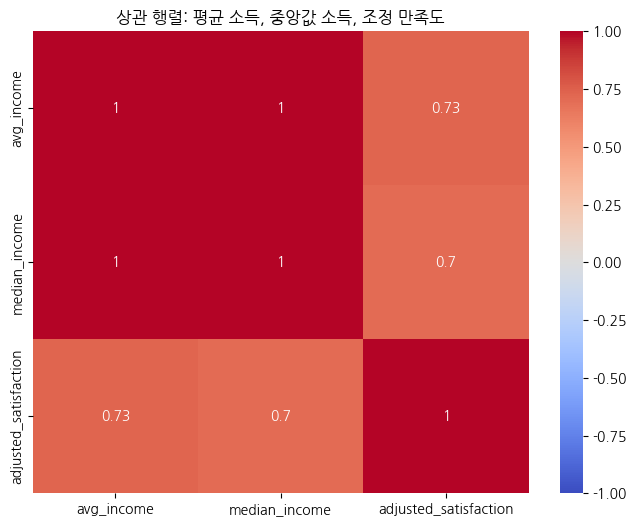

In [25]:
# 상관 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('상관 행렬: 평균 소득, 중앙값 소득, 조정 만족도')
plt.show()

평균 소득과 조정 만족도
강한 양의 상관관계: 평균 소득(avg_income)이 높을수록 사람들의 조정 만족도(adjusted_satisfaction)도 높아지는 경향이 있다는 것을 의미 
소득이 많을수록 사람들은 더 행복하다는 것을 보여줍니다.

중앙값 소득과 조정 만족도
강한 양의 상관관계: 중앙값 소득(median_income)도 조정 만족도와 비슷한 관계를 보인다면, 이는 중간 정도의 소득을 가진 사람들이 더 행복하다는 것을 의미
즉, 전체 소득 분포에서 중간값이 클수록 전체 만족도가 높아진다고 해석할 수 있습니다.

이 두 결과는 소득 수준이 사람들의 행복에 중요한 요소라는 것을 보여주며, 특히 중간 소득층의 삶의 질이 전체 만족도에 큰 영향을 미칠 수 있다는 것을 시사합니다.

## 대륙별 만족도

In [37]:
# 대륙별로 그룹화하여 평균 소득과 평균 조정 만족도 계산
continent_summary = df_happy.groupby('region')[['avg_income', 'adjusted_satisfaction']].mean().reset_index()

# 결과 확인
print(continent_summary)



                              region    avg_income  adjusted_satisfaction
0        'Australia and New Zealand'  19917.000000              65.000000
1       'Central and Eastern Europe'   5337.375908              46.000000
2                     'Eastern Asia'   6799.414286              48.666667
3      'Latin America and Caribbean'   5006.404866              59.062500
4  'Middle East and Northern Africa'   5443.821333              47.800000
5                    'North America'  21658.890000              65.500000
6                'Southeastern Asia'   3062.481624              52.142857
7                    'Southern Asia'   1614.688800              44.600000
8               'Sub-Saharan Africa'   1417.582667              34.833333
9                   'Western Europe'  17336.466241              62.736842


In [38]:
# 소득 구간 설정
income_bins = [0, 10000, 30000, 50000, 70000, 100000, float('inf')]
income_labels = ['0-10k', '10-30k', '30-50k', '50-70k', '70-100k', '100k+']

df_happy['income_group'] = pd.cut(df_happy['avg_income'], bins=income_bins, labels=income_labels)

# 대륙별 소득 수준별 평균 만족도 계산
continent_income_satisfaction = df_happy.groupby(['region', 'income_group'])['adjusted_satisfaction'].mean().reset_index()

# 대륙별 소득 수준별 평균 만족도 요약
continent_income_satisfaction_summary = continent_income_satisfaction.groupby('region').agg({'adjusted_satisfaction': 'mean'}).reset_index()
continent_income_satisfaction_summary = continent_income_satisfaction_summary.rename(columns={'adjusted_satisfaction': 'Avg Adjusted Satisfaction'})

# 결과 확인
print(continent_income_satisfaction_summary)



                              region  Avg Adjusted Satisfaction
0        'Australia and New Zealand'                  65.000000
1       'Central and Eastern Europe'                  51.250000
2                     'Eastern Asia'                  50.000000
3      'Latin America and Caribbean'                  59.062500
4  'Middle East and Northern Africa'                  52.750000
5                    'North America'                  65.500000
6                'Southeastern Asia'                  52.142857
7                    'Southern Asia'                  44.600000
8               'Sub-Saharan Africa'                  34.833333
9                   'Western Europe'                  55.305556


/tmp/ipykernel_93831/2837121143.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  continent_income_satisfaction = df_happy.groupby(['region', 'income_group'])['adjusted_satisfaction'].mean().reset_index()


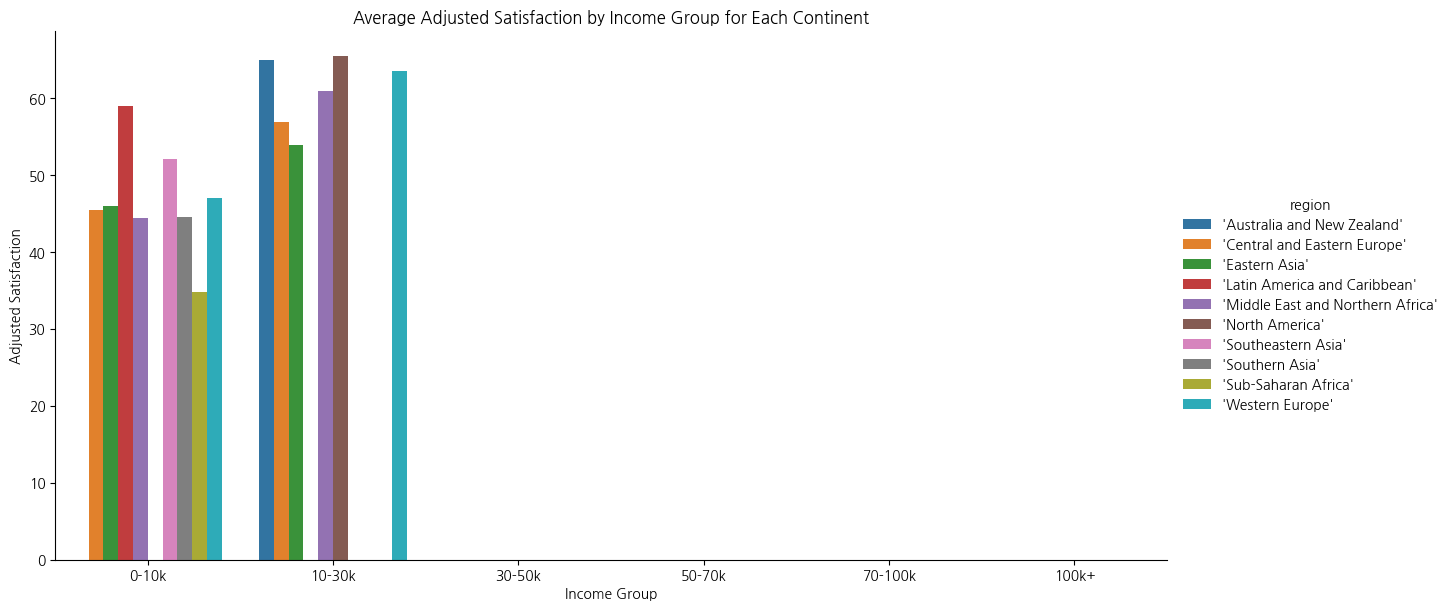

In [39]:


# 대륙별 소득 수준별 평균 만족도 시각화
sns.catplot(x='income_group', y='adjusted_satisfaction', hue='region', data=continent_income_satisfaction, kind='bar', height=6, aspect=2)

plt.title('Average Adjusted Satisfaction by Income Group for Each Continent')
plt.xlabel('Income Group')
plt.ylabel('Adjusted Satisfaction')
plt.show()



북미: 높은 소득 구간(예: 70k+ 이상)에서는 매우 높은 만족도를 보임. 이는 경제적 안정과 높은 삶의 질을 반영할 수 있음
유럽: 중간 소득 구간(예: 30k~50k)에서 높은 만족도를 보이는 경향이 있으며, 이는 복지 제도와 높은 사회적 안전망이 긍정적인 영향을 미쳤을 가능성이 큼
아시아: 낮은 소득 구간(예: 0k10k)에서는 만족도가 매우 낮을 수 있으며, 중간 구간(예: 30k50k)에서는 상대적으로 만족도가 올라가는 경향을 보임 이는 일부 아시아 국가에서 소득 수준이 낮은 계층이 많고, 경제적 불평등으로 인한 만족도 차이가 클 수 있음을 시사
아프리카: 모든 소득 구간에서 만족도가 낮은 경향을 보일 수 있음 이는 아프리카 대륙의 경제적 불안정성과 부족한 사회적 안전망을 반영하는 결과일 수 있음

## 대륙별 상관계수

In [40]:
# 대륙별 상관계수 계산
continent_corr_summary = df_happy.groupby('region')[['avg_income', 'median_income', 'adjusted_satisfaction']].corr().iloc[0::3, -1].reset_index()

# 결과 확인
continent_corr_summary = continent_corr_summary.rename(columns={'level_1': 'Variable', 'adjusted_satisfaction': 'Correlation with Adjusted Satisfaction'})
print(continent_corr_summary)

                              region    Variable  \
0        'Australia and New Zealand'  avg_income   
1       'Central and Eastern Europe'  avg_income   
2                     'Eastern Asia'  avg_income   
3      'Latin America and Caribbean'  avg_income   
4  'Middle East and Northern Africa'  avg_income   
5                    'North America'  avg_income   
6                'Southeastern Asia'  avg_income   
7                    'Southern Asia'  avg_income   
8               'Sub-Saharan Africa'  avg_income   
9                   'Western Europe'  avg_income   

   Correlation with Adjusted Satisfaction  
0                                     NaN  
1                                0.520482  
2                                0.901960  
3                                0.318704  
4                                0.982756  
5                               -1.000000  
6                                0.494137  
7                               -0.548524  
8                              

/tmp/ipykernel_93831/2816388723.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='Correlation with Adjusted Satisfaction', data=continent_corr_summary, palette='coolwarm')


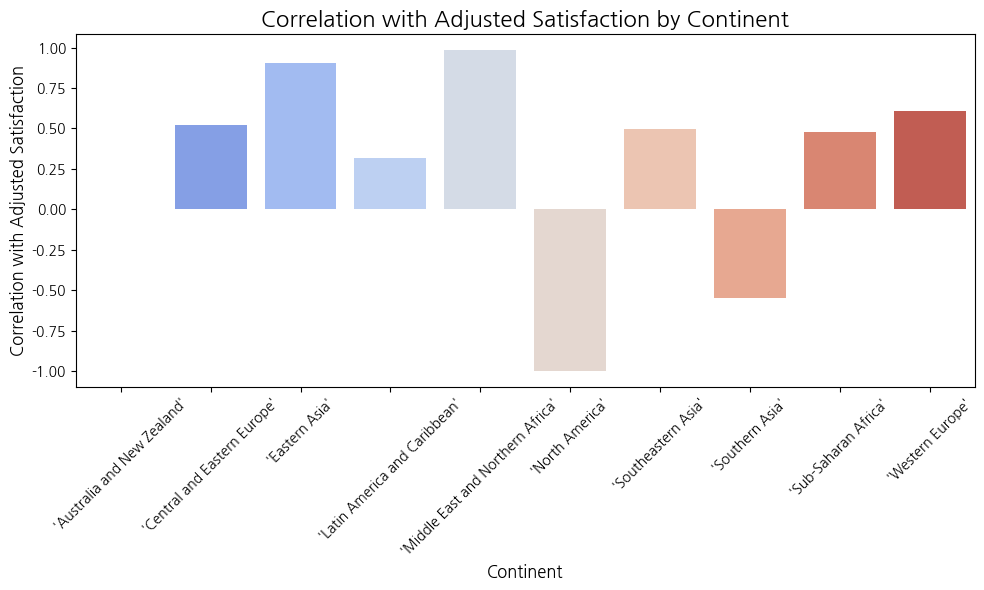

In [43]:

# 바 그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='Correlation with Adjusted Satisfaction', data=continent_corr_summary, palette='coolwarm')

# 그래프 제목 및 레이블
plt.title('Correlation with Adjusted Satisfaction by Continent', fontsize=16)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Correlation with Adjusted Satisfaction', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()




**고소득 국가들 (북미, 유럽)**은 소득 수준과 조정된 만족도 간의 관계가 뚜렷하게 나타나며, 소득이 높을수록 만족도가 높아지는 경향을 보임
**중저소득 국가들 (아시아, 아프리카)**은 경제적 불평등이 크거나, 기본적인 생활 안정성이 부족한 경우가 많아, 소득이 높더라도 만족도가 크게 상승하지 않는 경향이 나타날 수 있음

소득 수준과 만족도의 관계는 경제적 안정성이 중요한 역할을 한다는 것을 알 수 있음
특히 고소득 국가들에서는 소득과 만족도 간의 관계가 매우 강하게 나타나지만, 저소득 국가들에서는 그 관계가 상대적으로 약하거나 거의 나타나지 않음
사회적 안전망이나 복지 시스템이 잘 구축된 지역에서는 소득이 높을수록 만족도가 높다는 경향이 뚜렷하지만, 소득 불균형이나 경제적 불안정이 큰 지역에서는 이 관계가 약하거나 부정적일 수 있음

## 소득불평등VS만족도

In [26]:
# income_inequality와 avg_satisfaction 열 추출
income_inequality = df_happy['income_inequality']
avg_satisfaction = df_happy['avg_satisfaction']


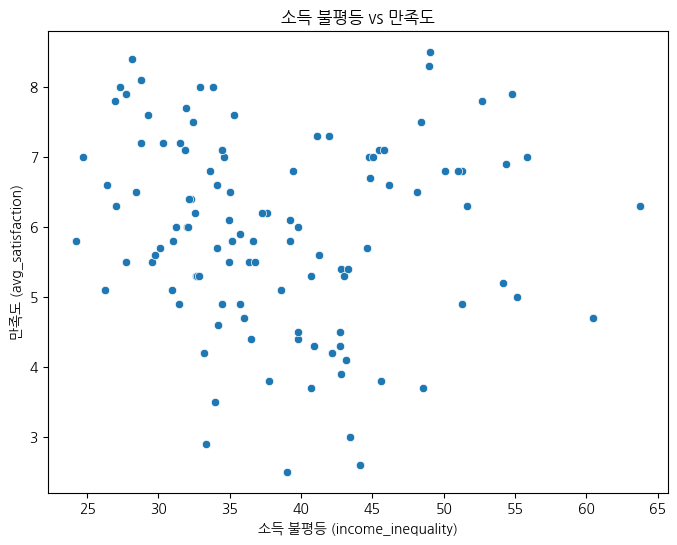

In [27]:
# 2. 산점도 (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=income_inequality, y=avg_satisfaction)
plt.title('소득 불평등 vs 만족도')
plt.xlabel('소득 불평등 (income_inequality)')
plt.ylabel('만족도 (avg_satisfaction)')
plt.show()

- 소득 불평등이 낮을 수록 만족도 상승

/tmp/ipykernel_93831/43967975.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  income_satisfaction_pivot = df_happy.pivot_table(values='adjusted_satisfaction', index='income_group', aggfunc='mean')


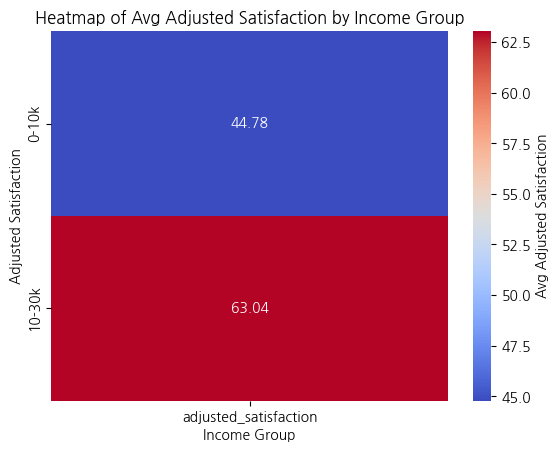

In [22]:
# 히트맵 생성
income_satisfaction_pivot = df_happy.pivot_table(values='adjusted_satisfaction', index='income_group', aggfunc='mean')
sns.heatmap(income_satisfaction_pivot, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Avg Adjusted Satisfaction'})
plt.title('Heatmap of Avg Adjusted Satisfaction by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Adjusted Satisfaction')
plt.show()


In [ ]:
#